# AIAP Week 6 - Building a Machine Learning Application

Welcome to the last week of our coursework! In this week, we will look at deploying a model we have built in previous weeks. Unlike past weeks, where the focus is on the development of a high-performing statistical model, we will look at how to properly use this model, to put it into a server, and let users use it without the need of opening up our Jupyter notebook.   
    
 It is important to note that because of the nature of this week's assignment, the skills required will be slightly different from prior weeks. As always, feel free to engage your peers or any of us if you would like more information. __For those who are new to serving code__, do take the time to understand the underlying concepts instead of copying code. __For those with prior experience__, you might want to focus on serialising a model, dockers, or exploring big data tools that are not commonly seen in the typical software stack.

Goals for the week:
1. To deploy an AI/Machine Learning application
2. To create a reproducible project
3. To prototype quickly and work smart i.e. look for existing open-source projects and improvise them based on your project needs
4. To have fun :)

Credits to Raimi Karim (batch 1 apprentice) for resources for the week.

## 1. Project Idea

Because the nature of this week's coursework is to build a simple machine learning app, the project will be more free form. Our approach is as follows: we will prepare a baseline problem statement with close hand-holding for people who have not had prior experience with software engineering to work on. If after approaching this toy example, you feel that you are capable of doing more, we warmly invite you to give it a try, and perhaps share with the class. If you feel that this is trivial, you may wish to attempt your own problem statement from the start.

<font color=darkblue>Our baseline project will be printed in this colour - dark blue. Jupyter Lab users may not be able to see this colour.</font>

Like any other app project, we begin with defining a good problem statement. Formulating a clear problem statement will help give clarity to the problem we are solving. A well defined problem statement now allows us to focus on engineering and model development later, which means less distraction and time wasted due to context switching.

One way to think about problem statements are through the '5W/1H' approach. Where we answer the following questions:  
  
- **Who** experiences this problem? What are their characteristics?  
- **What** is the actual problem?  
- **Why** does this app solve the problem?  
- **How** will it be implemented?  
- **When, where** should it be deployed? (not relevant for this week)

<font color=darkblue>For a baseline project, we will be attempting to build a fruit classifier, which attempts to classify 3 different types of fruits: apples, oranges and pears. Suppose we have someone who has difficulty identifying fruits. In that case, building this app will help him identify fruit appropriately.</font>

## 2. Workflow

We now move on to the actual workflow of training the model. The below is a standard set of steps for a mini-project. However, depending what what you do, you might need some variation, so modify them to your needs at your own discretion.<br/>
[Image classification from scratch in keras](https://towardsdatascience.com/image-detection-from-scratch-in-keras-f314872006c9)

### 2.1 Obtain data

We begin by collecting the data that we wish to train on. In this step, think more about the data you will need - how much would you need, and in what form should it be? In some cases, the problem we want to solve might already have a clean dataset to work on. In other cases, pre-trained models make our problem easier, and hence we only need a small fraction of a full-fledge training data.  

For problems where data might not be present, you might want to also think about how to collect and label data. <br/>

<font color=darkblue>For our case, we will begin by collecting images of each of the 3 fruits. We will use Google's image search to crawl a few pages of images for each label. Luckily, there are already tools out there to help you crawl of images - you can use this [python package](https://github.com/hardikvasa/google-images-download), or alternatively, `fastai` library has a [`download_images`](https://docs.fast.ai/vision.data.html#download_images) method.</font>

In [1]:
import keras
import matplotlib.pyplot as plt
import cv2
# import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras import layers,models,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import requests
from PIL import Image
import io

# from keras.preprocessing.image import img_to_array,load_img

from src.downloadImage import PreprocessData
%matplotlib inline

Using TensorFlow backend.


In [2]:

#Downloads 100 images
preProcess = PreprocessData()
# preProcess.downloadData("Apples,Pears,Oranges")

hello


 - Now manually deleted corrupted images (To automate this later)

### 2.2 Preprocess data

After getting the data, the next step is to see if our data is clean, and can be fed into the model.

Check if our data is clean involves checking for null values, extreme outliers, consistency of file names etc. This is dependent on the nature of your dataset. Sometimes it might also help to visualise your data.

We would also like to split our data into train-validation-test sets to track if our trained model later performs as well on the validation/test set as it did on our training set.

<font color=darkblue>In our case, we will like to split this dataset into train and test sets, using appropriate data loaders/generators to create labels of 0, 1 and 2 for the fruits (or otherwise appropriate). Using the appropriate library of your choice, preprocess the images with the right preprocessing methods - resizing into 224px, then doing a center crop, normalizing colour values (you can just divide by 255), and finally turning each image into a 3x244x244 tensor. You may also do additional augments if you please.</font>

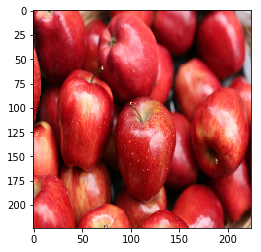

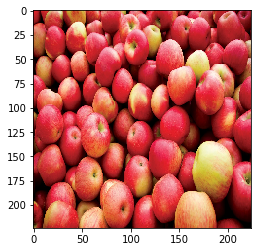

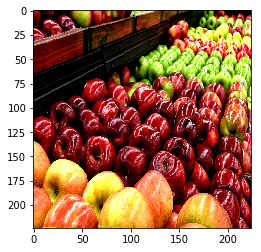

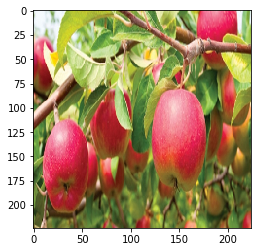

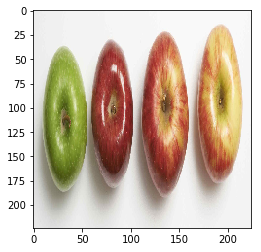

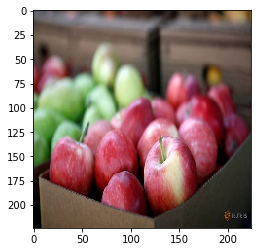

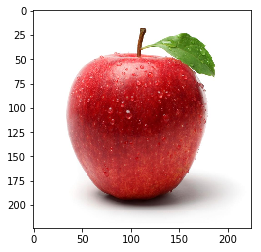

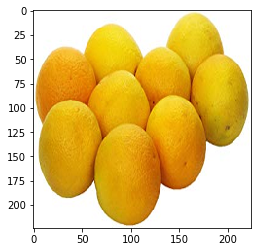

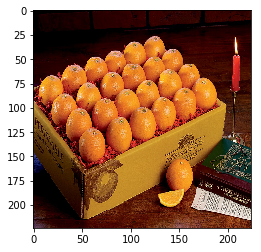

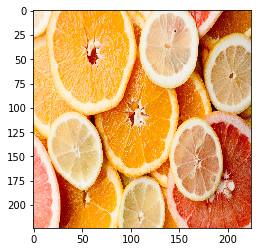

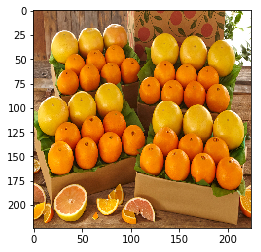

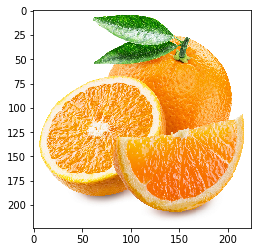

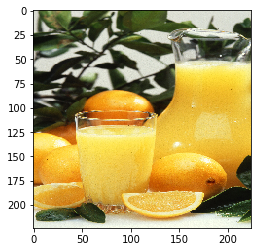

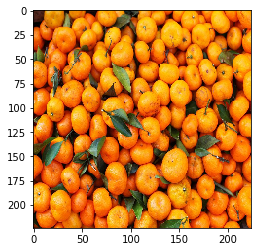

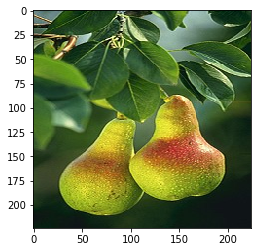

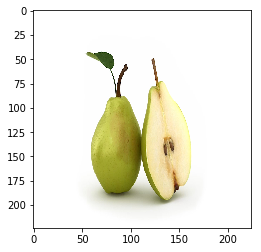

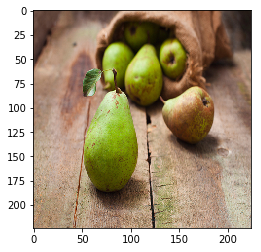

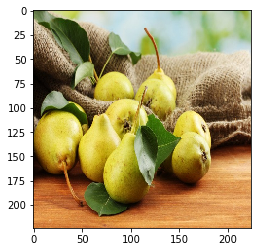

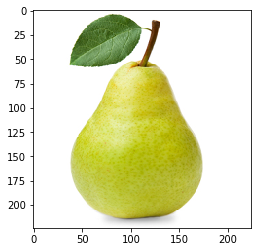

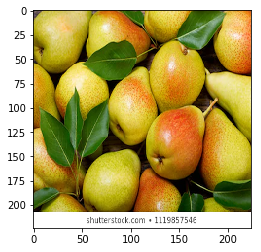

In [3]:
img_dir='/home/jupyter/AIAP-Week6/src/downloads/'
preProcess.loadAllImages(img_dir)
allImg=preProcess.allImg
# plt.figure(figsize=(20,10))
for i,instance in enumerate(allImg):
    if(i%15==0): #Just showing random images
        img=cv2.resize(cv2.imread(instance),(224,224),interpolation=cv2.INTER_CUBIC)
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img=plt.imread(instance)
#         plt.subplot(2,5,i+1)
        plt.imshow(RGB_img)
        plt.show()


In [4]:
X=[]
y=[]
y_mapping={0:'apples',1:'pears',2:'oranges'}

def plotDataset(i):
    print(y_mapping[y[i]])
    plt.imshow(X[i])
    plt.show()

def createDataset(X,y,data,i):
    for f in data:
        img=cv2.resize(cv2.imread(f),(224,224),interpolation=cv2.INTER_CUBIC)
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(RGB_img)
        y.append(i)

createDataset(X,y,preProcess.apples,0)
createDataset(X,y,preProcess.pears,1)
createDataset(X,y,preProcess.oranges,2)    

oranges


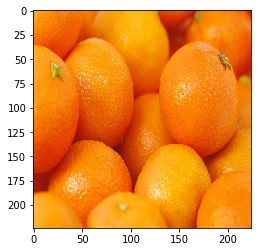

In [5]:
# plt.figure(figsize=(20,10))
# cols=5
# for i in range(cols):
#     plt.subplot(2,5,i+1)
#     plt.imshow(X[i])

plotDataset(292)

In [6]:
X=np.array(X)
y=np.array(y)

print(" Shape of X is %s and Shape of y is %s" %(X.shape,y.shape))


 Shape of X is (300, 224, 224, 3) and Shape of y is (300,)


In [7]:
#One hot encode the output
n_classes = 3
y= keras.utils.to_categorical(y, n_classes)

In [8]:
X_train_all,X_test,y_train_all,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
X_train,X_val,y_train,y_val=train_test_split(X_train_all,y_train_all,test_size=0.33,random_state=42)

In [10]:
X_val.shape

(75, 224, 224, 3)

### 2.3 Train model

Train your model locally (on your computer) or in Google Colab. Once done, run a few tests on the test set, and see if it performs as well as in the training set. If you are not satisfied, you can retrain your model. Finally, export your model out with the appropriate format, and download the weights for future use. In most cases, you should look to run a transfer learning model on an already optimised model. For image models, you can try something like resnet50. There have been some discussion about transfer learning in text models too - models such as BERT and ELMo... yes we agree that the names are ridiculous.

<font color=darkblue>In our case, let's begin with a pretrained resnet50 model - ample code examples should be available for both torchvision and Keras. Freeze all layers except the last, and replace that with a linear layer of output size 3, fed through a softmax loss function. Be weary of overfitting when you train your model.</font>

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

#Add Batch Normalization layer as well
#Move to Google Cloud

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(n_classes, activation='softmax'))  #Sigmoid function at the end because we have


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       147584    
__________

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
#Image Augmentation
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [20]:
batch_size=32
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [21]:
early_stopping_monitor = EarlyStopping(patience=5)
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(X_train) // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=len(X_val) // batch_size,
                             callbacks=[early_stopping_monitor])

Epoch 1/64
4/4 [==============================] - 20s 5s/step - loss: 1.3158 - acc: 0.3359 - val_loss: 1.0918 - val_acc: 0.3125
Epoch 2/64
4/4 [==============================] - 1s 194ms/step - loss: 1.0444 - acc: 0.4018 - val_loss: 0.9475 - val_acc: 0.5116
Epoch 3/64
4/4 [==============================] - 0s 95ms/step - loss: 0.9001 - acc: 0.5613 - val_loss: 0.9022 - val_acc: 0.6047
Epoch 4/64
4/4 [==============================] - 0s 99ms/step - loss: 0.9281 - acc: 0.5993 - val_loss: 0.6390 - val_acc: 0.7969
Epoch 5/64
4/4 [==============================] - 1s 234ms/step - loss: 1.0324 - acc: 0.5636 - val_loss: 0.6986 - val_acc: 0.7442
Epoch 6/64
4/4 [==============================] - 2s 383ms/step - loss: 0.6810 - acc: 0.7812 - val_loss: 0.7582 - val_acc: 0.6744
Epoch 7/64
4/4 [==============================] - 1s 364ms/step - loss: 0.6592 - acc: 0.7418 - val_loss: 0.6957 - val_acc: 0.8125
Epoch 8/64
4/4 [==============================] - 1s 353ms/step - loss: 0.6054 - acc: 0.8161 -

In [22]:
#Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

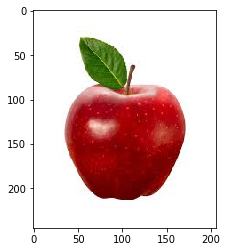

In [34]:
# image_url='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSo5PneLeO2C-3O6ON_Nzlxn34XM9MiXod-sjCOr3o8oAfFTWmk9Q'
# response=requests.get(image_url)
# img=Image.open(io.BytesIO(response.content))
# plt.imshow(img)

# X_img = np.array(img) 
# X_img=cv2.resize(X_img,(224,224),interpolation=cv2.INTER_CUBIC)

In [23]:
# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator=test_datagen.flow(X_test)
# model.evaluate_generator(test_generator,y_test)
#Fix this later

In [23]:
X_test=X_test/255
model.evaluate(X_test,y_test)

75/75 [==============================] - 0s 2ms/step


[0.29410460670789085, 0.8933333373069763]

__Transfer Learning with InceptionRestNet__ <br/>
[Transfer Learning and Image Classification](https://towardsdatascience.com/transfer-learning-and-image-classification-using-keras-on-kaggle-kernels-c76d3b030649)

In [24]:
from keras.applications import InceptionResNetV2
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [32]:
# conv_base.summary()
#Commenting out, it's too long

In [25]:
modelTf = models.Sequential()
modelTf.add(conv_base)
         
modelTf.add(layers.Flatten())
modelTf.add(layers.Dropout(0.5))  #Dropout for regularization
modelTf.add(layers.Dense(512, activation='relu'))
modelTf.add(layers.Dense(n_classes, activation='softmax'))

In [26]:
modelTf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Model)  (None, 5, 5, 1536)        54336736  
_________________________________________________________________
flatten_3 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 38400)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               19661312  
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 1539      
Total params: 73,999,587
Trainable params: 73,939,043
Non-trainable params: 60,544
_________________________________________________________________


In [27]:
conv_base.trainable = True
print('Number of trainable weights before freezing the conv base:', len(modelTf.trainable_weights))
conv_base.trainable = False
print('Number of trainable weights after freezing the conv base:', len(modelTf.trainable_weights))

Number of trainable weights before freezing the conv base: 492
Number of trainable weights after freezing the conv base: 4


In [28]:
modelTf.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [29]:
early_stopping_monitor = EarlyStopping(patience=10)
history = modelTf.fit_generator(train_generator,
                              steps_per_epoch=len(X_train) // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=len(X_val) // batch_size,
                             callbacks=[early_stopping_monitor])

Epoch 1/64
4/4 [==============================] - 15s 4s/step - loss: 6.1554 - acc: 0.3808 - val_loss: 8.7065 - val_acc: 0.4062
Epoch 2/64
4/4 [==============================] - 2s 407ms/step - loss: 8.8859 - acc: 0.3831 - val_loss: 7.0637 - val_acc: 0.5349
Epoch 3/64
4/4 [==============================] - 1s 322ms/step - loss: 7.5550 - acc: 0.4364 - val_loss: 9.2124 - val_acc: 0.3953
Epoch 4/64
4/4 [==============================] - 2s 375ms/step - loss: 7.9176 - acc: 0.4453 - val_loss: 7.9776 - val_acc: 0.4531
Epoch 5/64
4/4 [==============================] - 1s 323ms/step - loss: 5.7700 - acc: 0.5908 - val_loss: 9.3584 - val_acc: 0.3953
Epoch 6/64
4/4 [==============================] - 1s 326ms/step - loss: 5.8716 - acc: 0.6016 - val_loss: 10.3291 - val_acc: 0.3488
Epoch 7/64
4/4 [==============================] - 1s 356ms/step - loss: 6.2383 - acc: 0.5641 - val_loss: 9.8306 - val_acc: 0.3906
Epoch 8/64
4/4 [==============================] - 1s 324ms/step - loss: 6.4982 - acc: 0.536

In [30]:
modelTf.evaluate(X_test,y_test)

75/75 [==============================] - 1s 9ms/step


[7.434608243306478, 0.5333333357175192]

In [31]:
model.evaluate(X_test,y_test)

75/75 [==============================] - 0s 2ms/step


[0.29410460670789085, 0.8933333373069763]

In [32]:
#Save the model
modelTf.save_weights('model_wieghts_Tf.h5')
modelTf.save('model_keras_Tf.h5')

__Choosing ResNet vs self Conv Model__
- Accuracy wise, our self Conv model performed far better the ResNet model
- Biggest reason, could be the small dataset used.
- We'll try both models in the deploymen

### 2.4 Deploy model

You can start with a simple localhosted [Python Flask](http://flask.pocoo.org) app for the deployment of your model. In this Flask app, provide an HTML endpoint that allows a user to submit a datapoint, and provide a prediction. Ensure that a user is able to make calls to your API by providing an input. A simple way to test this would be through the Postman application.

<font color=darkblue>We will use the PIL package to help process the image given into the appropriate format. Your endpoint should accept a 224x224 image, which PIL can convert into a numpy array to be ingested as a tensor into the model.

Write a `@app.route` to take in a request from a user, and provide a prediction response to the user. For those who are new to applications, take some time to understand how web servers are designed, and specifically, what are routes  in the context of a Flask app.</font>

For people who are more advanced, you could also deploy your model in the following environments:
- **Server**
  - Local
  - Self-hosted (WSGI, Nginx)
  - App Engine
  
- **Docker**
- **Front-end browser-based**
  - tensorflow.js + GitHub Pages
- **Mobile (Android)** <br>
  - Package as an APK for distribution

## 3. A Little Bit More

In this next section, we will look at some other bits of application development that could be useful to know.

### 3.1 Unit Testing, Integration Testing

In the space of software engineering, complex operations happening within apps, in conjunction with multiple engineers working on multiple areas, make application development a hairy and unstable process. To mitigate the risks of bugs appearing in production environments, we write thorough tests that, to the best of our ability, ensure the accuracy and stability of our code. 

We will not go into detail into this section as this lies in the domain of software engineering, but understand that in production environments, testing is key to stability of any app. In addition, we use approaches like test-driven development (TDD), as well as a mix of tests at different levels.

It is interesting to note the inherent probabalistic nature of machine learning models - we are not going to get the right predictions every time. How do we ensure that our tests will ensure the correctness of our code in the probabalistic, flaky environment of machine learning? We don't exactly have a gold standard answer to this question right now.

### 3.2 Documentation (Important - Submission Details)

Documentation is extremely important to ensure that when we pass our code on to another analyst or engineer, they will know how to work with and modify the code for their own use. Especially given that AI Singapore needs highly reusable code and exchange of information between teams, we would like to set high standards for documentation.

For this assignment, we would expect a basic level of documentation written in a `README.md` in your repository. This document should discuss what your app would do, and give basic instructions - lines of bash commands - that can guide a user to run your code base on his computer. The right way to do this is to ask a partner to try running your code from the GitHub repository. If it runs with your instructions, you're good to go.

[Here's a good, simple README.md file.](https://github.com/berlotto/flask-app-template)

__Submission__: to submit, create a NEW REPOSITORY this week inside [this new project folder](https://bitbucket.ai3.aisingapore.org:9443/projects/ABA/) and push your code instead. Be sure to include a README.md as well as a [.gitignore](https://www.gitignore.io/) (as discussed by Deepan a few weeks ago). Please __do not__ upload large datasets or model weights into the repository - we have limited server space!

## 4. Examples

These are some ideas to get you started:


**Image**

  - Classify flowers: https://www.tensorflow.org/hub/tutorials/image_retraining
  - Classify pictures of food for mobile users that helps them to easily attach hashtags for their Instagram post.
  - Create your home security camera that detects faces of your family members using Raspberry Pi and grants access.
  - Classify if a picture is an item that can be recycled or not. 
  - Recognise mathematical equations using Optical Character Recognition.
  - Singlish meme: Automatically caption pictures.
  - Style transfer: Generate an image of a utopia given an input.

**Text**
  - Generate text https://www.tensorflow.org/tutorials/sequences/text_generation
  - Summarise a code in 1 paragraph.
  - Using POS tagging, summarise a research paper in 1 paragraph.
  - Use NLP to generate a Jupyter notebook exercise for AIAP for the next week.
  - Cluster AI Singapore's web pages into meaningful categories.
  - Generate/classify fake news in Singapore.
  - A Singlish aunty-chatbot for buying groceries.

**Audio**
  - Classify sounds https://www.tensorflow.org/tutorials/sequences/audio_recognition
  - Classify between the different Chinese dialects.
  - Speech-to-Text application that identifies the main keywords and googles them.
  - Transpose a music from major to minor scale using recurrent neural networks.

**Video**
  - A better push-up/sit-ups counter (oops).
  - Dance-Dance revolution.
  - Control a character in a game using pose recognition.